<img src="https://docs.dask.org/en/latest/_images/dask_horizontal.svg" align="right" width="30%" alt="Dask logo">
<img src="https://userena.cl/images/logos_web/descarga/test_hor.png" align="left" width="30%" alt="Dask logo">

**Título del Laboratorio: Comparación de Programación Paralela con Dask Bags y Programación Serial en Python**

**Objetivos del Laboratorio:**
- Comparar el uso de Dask Bags para la programación paralela con la programación serial en Python.
- Demostrar la eficiencia del procesamiento paralelo en Dask Bags en comparación con el procesamiento serial.

**Prerrequisitos:**
- Conocimientos básicos de Python.
- Tener Dask instalado en tu entorno de Python (puedes instalarlo con `pip install dask`).

### Paso 1: Código Serial
___

**Crear una lista de datos desestructurados**


In [1]:
# Supongamos que tenemos una lista de datos desestructurados
data = [{'nombre': 'Alice', 'edad': 25},
        {'nombre': 'Bob', 'edad': 30},
        {'nombre': 'Charlie', 'edad': 22},
        {'nombre': 'David', 'edad': 27},
        {'nombre': 'Eve', 'edad': 35}]

In [2]:
data

[{'nombre': 'Alice', 'edad': 25},
 {'nombre': 'Bob', 'edad': 30},
 {'nombre': 'Charlie', 'edad': 22},
 {'nombre': 'David', 'edad': 27},
 {'nombre': 'Eve', 'edad': 35}]

**Realizar operaciones de transformación en serie**

In [3]:
# Ejemplo de filtrado por edad mayor de 25 en código serial
def filtro_edad_mayor_25_serial(data):
    resultado = []
    for item in data:
        if item['edad'] > 25:
            resultado.append(item)
    return resultado

resultado_filtrado_serial = filtro_edad_mayor_25_serial(data)

**Realizar operaciones de agregación en serie**

In [4]:
# Ejemplo de cálculo de la edad promedio en código serial
def edad_promedio_serial(data):
    edades = [item['edad'] for item in data]
    promedio = sum(edades) / len(edades)
    return promedio

promedio_edad_serial = edad_promedio_serial(data)

**Visualizar los resultados**

In [5]:
%%time
print("Datos filtrados por edad mayor de 25 (Serial):")
print(resultado_filtrado_serial)

Datos filtrados por edad mayor de 25 (Serial):
[{'nombre': 'Bob', 'edad': 30}, {'nombre': 'David', 'edad': 27}, {'nombre': 'Eve', 'edad': 35}]
CPU times: user 305 μs, sys: 226 μs, total: 531 μs
Wall time: 486 μs


In [6]:
%%time
print("\nEdad promedio (Serial):")
print(promedio_edad_serial)


Edad promedio (Serial):
27.8
CPU times: user 129 μs, sys: 46 μs, total: 175 μs
Wall time: 152 μs


### Paso 2: Código Paralelo
___

Dask Bags es una parte de la biblioteca Dask que se utiliza para trabajar con datos desestructurados o semiestructurados de manera eficiente y paralela en Python. Permite realizar operaciones de procesamiento de datos en paralelo, lo que es útil para tareas como la limpieza, transformación y análisis de grandes conjuntos de datos.

**Conceptos Clave:**

1. **Dask:** Dask es una biblioteca de Python que se utiliza para la programación paralela y distribuida. Proporciona estructuras de datos y herramientas para trabajar con datos que no caben en la memoria principal de la computadora y para realizar cálculos en paralelo.

2. **Dask Bags:** Dask Bags es una de las estructuras de datos proporcionadas por Dask. Está diseñada para manejar datos desestructurados que se pueden representar como una secuencia de elementos. Cada elemento puede ser un diccionario, una lista o cualquier otro tipo de objeto de Python.


**Ventajas de Dask Bags:**

- **Paralelismo fácil:** Dask Bags permite aprovechar fácilmente el paralelismo en tareas de procesamiento de datos.
- **Escalabilidad:** Puede manejar grandes conjuntos de datos que no caben en la memoria principal.
- **Interoperabilidad:** Se puede combinar con otras estructuras de datos de Dask, como DataFrames o Arrays, para abordar problemas complejos de análisis de datos.

**Paso 1: Importar las bibliotecas necesarias**

In [7]:
import dask.bag as db
from dask.diagnostics import ProgressBar

**Paso 2: Crear un Dask Bag a partir de datos desestructurados**
___

Puedes crear un Dask Bag a partir de una secuencia de datos desestructurados, como una lista de diccionarios o una colección de archivos JSON. Aquí es donde comienza el paralelismo, ya que Dask Bags divide automáticamente los datos en fragmentos más pequeños para su procesamiento paralelo.


In [8]:
# Supongamos que tenemos una lista de datos desestructurados
data = [{'nombre': 'Alice', 'edad': 25},
        {'nombre': 'Bob', 'edad': 30},
        {'nombre': 'Charlie', 'edad': 22},
        {'nombre': 'David', 'edad': 27},
        {'nombre': 'Eve', 'edad': 35}]

# Crear un Dask Bag a partir de los datos
bag = db.from_sequence(data)

In [9]:
type(data)

list

In [10]:
bag

dask.bag<from_sequence, npartitions=5>

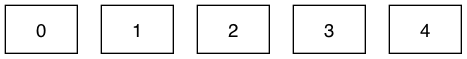

In [11]:
bag.visualize()

**Paso 3: Realizar operaciones de transformación en paralelo**

Dask Bags permite realizar operaciones de transformación en los datos de manera paralela. Puedes definir funciones que se aplicarán a cada elemento del Bag y Dask se encargará de distribuir estas operaciones en múltiples núcleos o nodos si es necesario. En este paso, estamos realizando una operación de filtrado en un Dask Bag llamado `bag`. La operación de filtrado se lleva a cabo mediante la función `filter()`.


In [12]:
# Ejemplo de filtrado por edad mayor de 25
def filtro_edad_mayor_25(item):
    return item['edad'] > 25

In [13]:
bag_filtrado = bag.filter(filtro_edad_mayor_25)

- `filtro_edad_mayor_25`: Es una función que definimos y que toma un elemento del Bag (`item`) como argumento. En este caso, estamos filtrando elementos en función de la edad, devolviendo `True` si la edad es mayor que 25 y `False` en caso contrario.

- `bag_filtrado`: Creamos un nuevo Bag (`bag_filtrado`) que contiene solo los elementos del Bag original (`bag`) para los cuales la función `filtro_edad_mayor_25` devuelve `True`. En otras palabras, estamos filtrando las personas mayores de 25 años.

La operación de filtrado es una operación común en el procesamiento de datos, ya que permite seleccionar un subconjunto de los datos basado en ciertos criterios. Dask Bags facilita esta tarea al permitirnos aplicar una función de filtro y obtener un nuevo Bag con los elementos que cumplen con ese filtro.

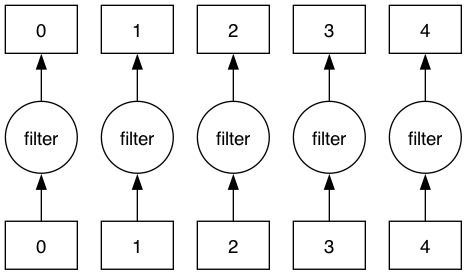

In [14]:
bag_filtrado.visualize()

**Paso 4: Realizar operaciones de agregación en paralelo**

Al igual que las operaciones de transformación, Dask Bags permite realizar operaciones de agregación en paralelo. Esto es útil para calcular estadísticas o resúmenes sobre los datos. En este paso, estamos realizando una operación de mapeo en un Dask Bag llamado `bag`. La operación de mapeo se lleva a cabo mediante la función `map()`. 



In [15]:
# Ejemplo de cálculo de la edad promedio
def edad_promedio(item):
    return item['edad']

In [16]:
promedio_edad = bag.map(edad_promedio).mean().compute()

In [17]:
_promedio_edad = bag.map(edad_promedio).mean()

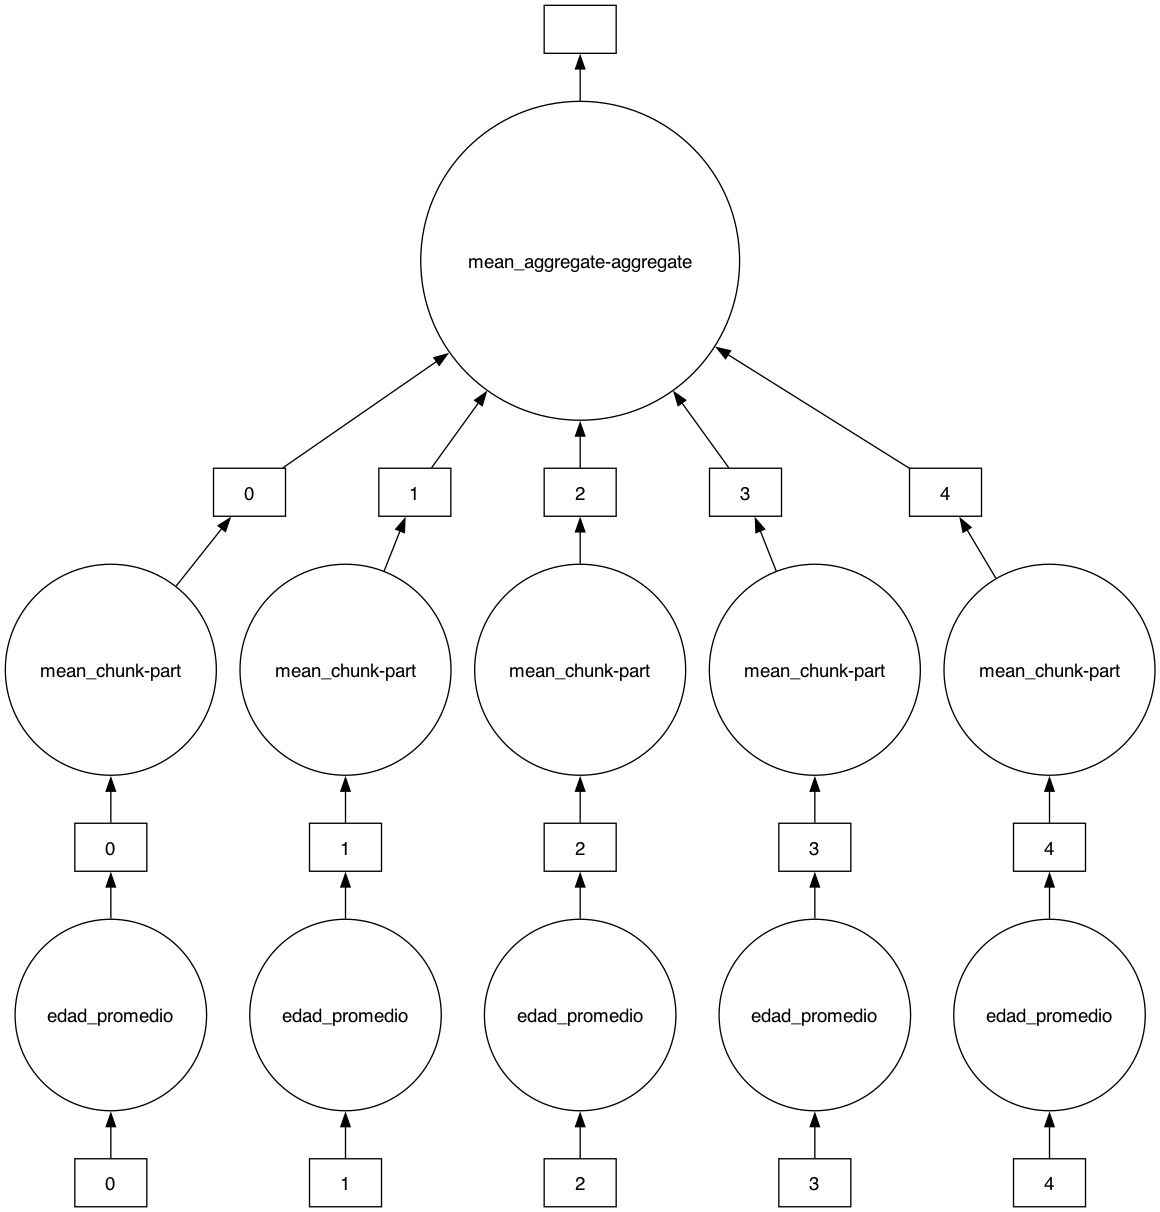

In [18]:
_promedio_edad.visualize()

- `edad_promedio`: Es una función que definimos y que toma una lista de elementos del Bag (`items`) como argumento. En este caso, estamos calculando el promedio de las edades de las personas en la lista.

- `promedio_edad`: Usamos la función `map()` para dividir el Bag original en grupos basados en el nombre (`'nombre'`) y luego aplicamos `foldby()` para calcular el promedio de las edades en cada grupo. El resultado es un nuevo Bag (`promedio_edad`) que contiene el promedio de edad para cada grupo de personas con el mismo nombre.

**Paso 5: Resultados**

In [19]:
%%time
with ProgressBar():
    resultado_filtrado = bag_filtrado.compute()

print("Datos filtrados por edad mayor de 25:")
print(resultado_filtrado)

print("\nEdad promedio:")
print(promedio_edad)

[########################################] | 100% Completed | 309.87 ms
Datos filtrados por edad mayor de 25:
[{'nombre': 'Bob', 'edad': 30}, {'nombre': 'David', 'edad': 27}, {'nombre': 'Eve', 'edad': 35}]

Edad promedio:
27.8
CPU times: user 11 ms, sys: 15.1 ms, total: 26.1 ms
Wall time: 333 ms
